In [2]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import utils as u
from scipy.signal import savgol_filter

In [3]:
filename='/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/WithTrace/228Th-grafico-tesi-im260421_1__0.npy'

coll=ca.NPYreader(filename,True).get_event()
for i in range(5,30,5):
        filename='/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/AnalisiBig3/228Th-grafico-tesi-im260421_1__'+str(i)+'.npy'
        temp=ca.NPYreader(filename,False).get_event()

        if(i==5):
            coll_tot=temp
        else:
            coll_tot=coll_tot+temp
            del(temp)
        #print('opened '+str(i))

print('coll events: '+str(coll.n_trace))
print('coll_tot events: '+str(coll_tot.n_trace))

/home/marco/work/tesi/data/228Th-grafico-tesi-im260421_1/WithTrace/228Th-grafico-tesi-im260421_1
coll events: 136889
coll_tot events: 3559114


In [4]:
curr1=coll.get_curr()
trace1=coll.get_traces()

<IPython.core.display.Javascript object>


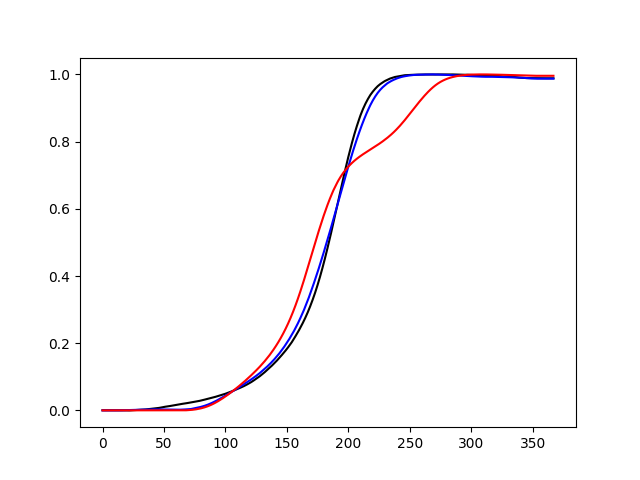

The difference between conf and SSE is: 3.698053202073152
The difference between conf and MSE is: 16.553035822521785


In [19]:
simm_obj=u.simm()
conf=np.load('/home/marco/work/tesi/data/TestSimm/trace228.npy')
plt.figure()
plt.plot(conf,color='black')
i=1
trace=trace1[i]
trace=savgol_filter(trace,30,0)
trace=trace-min(trace)
trace=trace/max(trace)
plt.plot(trace,color='b')

print('The difference between conf and SSE is: '+str(simm_obj.compute_simm3(trace1[i])))

i=10
trace=trace1[i]
trace=savgol_filter(trace,30,0)
trace=trace-min(trace)
trace=trace/max(trace)
plt.plot(trace,color='r')

print('The difference between conf and MSE is: '+str(simm_obj.compute_simm3(trace1[i])))

In [22]:
#Cut ae to see if between SSE and MSE persists a difference in risetime

coll_SSE=((coll_tot.subset('energy',0,1618)+coll_tot.subset('energy',1626,2098)+coll_tot.subset('energy',2110,2608)+coll_tot.subset('energy',2618)).subset('ae',1.90e-2,1.95e-2)).subset('energy',1550)
coll_MSE=((coll_tot.subset('energy',0,1590)+coll_tot.subset('energy',1597)).subset('ae',0,1.6e-2)).subset('energy',1550)

simm1=coll_MSE.get_simm()
simm2=coll_SSE.get_simm()

coll_SSE2=((coll_tot.subset('energy',0,1618)+coll_tot.subset('energy',1626,2098)+coll_tot.subset('energy',2110,2608)+coll_tot.subset('energy',2618)).subset('ae',1.90e-2,1.95e-2))
coll_MSE2=((coll_tot.subset('energy',0,1590)+coll_tot.subset('energy',1597)).subset('ae',0,1.6e-2))

simm3=coll_MSE2.get_simm()
simm4=coll_SSE2.get_simm()

<IPython.core.display.Javascript object>


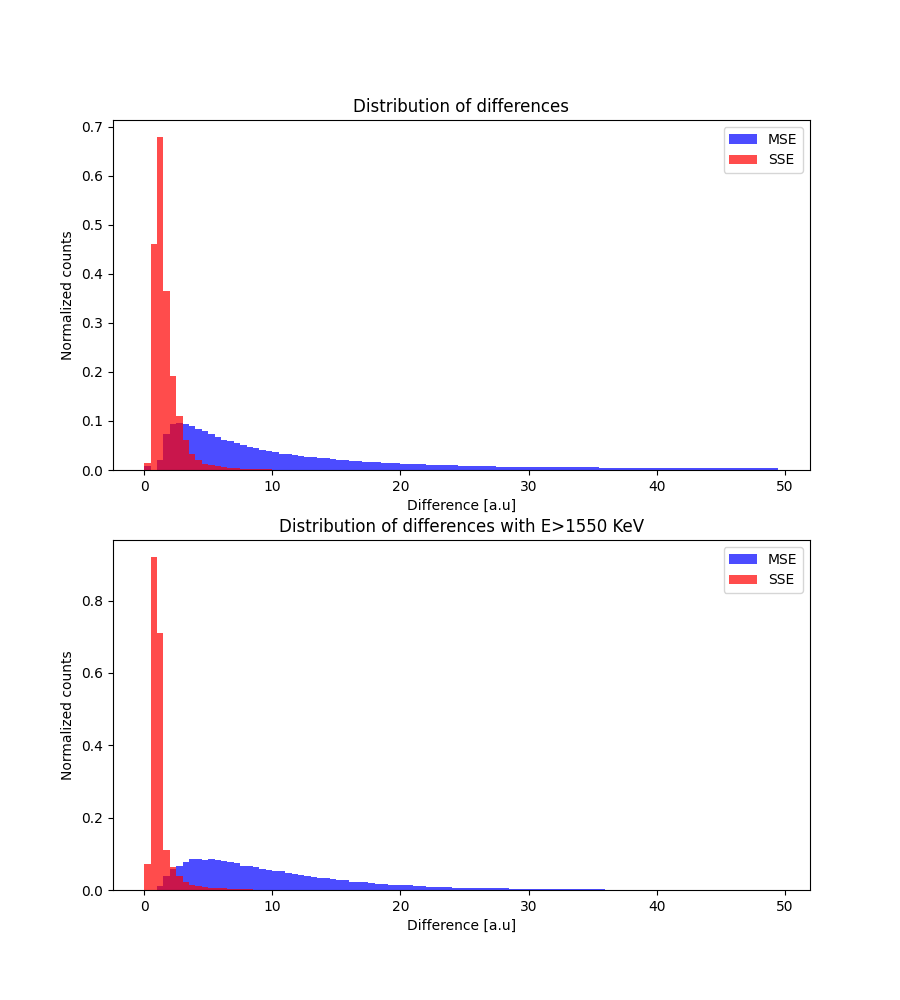

In [26]:
simm=np.arange(0,50,0.5)
fig,axs=plt.subplots(2,figsize=(9,10))
axs[0].hist(simm3,color='b',alpha=0.7,bins=simm,density=True,label='MSE')
axs[0].hist(simm4,color='r',alpha=0.7,bins=simm,density=True,label='SSE')
axs[0].set_title('Distribution of differences')

axs[1].hist(simm1,color='b',alpha=0.7,bins=simm,density=True,label='MSE')
axs[1].hist(simm2,color='r',alpha=0.7,bins=simm,density=True,label='SSE')
axs[1].set_title('Distribution of differences with E>1550 KeV')

axs[0].set(xlabel='Difference [a.u]')
axs[1].set(xlabel='Difference [a.u]')
axs[0].set(ylabel='Normalized counts')
axs[1].set(ylabel='Normalized counts')
axs[0].legend()
axs[1].legend()

<IPython.core.display.Javascript object>


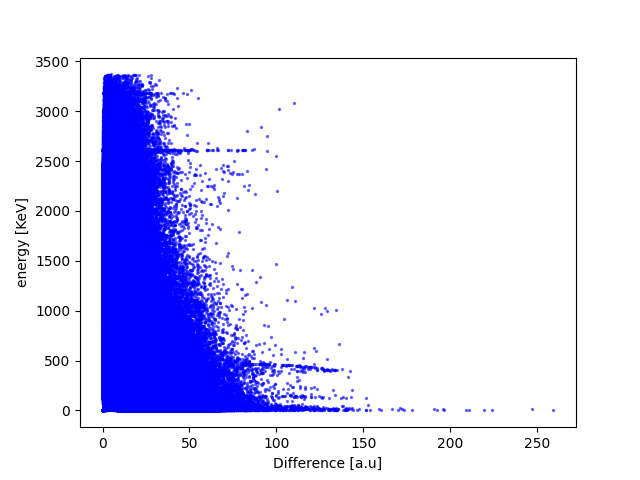

Text(0, 0.5, 'energy [KeV]')

In [27]:
#Scatter plot
plt.figure()
plt.scatter(coll_tot.get_simm(),coll_tot.get_energies(),s=2,alpha=0.5,color='b')
plt.show()

plt.xlabel('Difference [a.u]')
plt.ylabel('energy [KeV]')